In [1]:
import csv
import json
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("integrated_data.csv")

/Users/alyssachen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,21,22,23,24,34,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'RecordSequenceID', 'UniqueID', 'SourceID',
       'LocationFreqID', 'Location', 'Dataset', 'Organization', 'Other',
       'CountryName_FromSource', 'SubCountry_L1_FromSource',
       'SubCountry_L2_FromSource', 'Longitude1', 'Latitude1', 'Longitude2',
       'Latitude2', 'TotalWidth_m', 'TotalLength_m', 'TotalArea_Sq_m',
       'ShorelineName', 'WaterfrontName', 'BeachAreaLandcover', 'BeachType',
       'EventType', 'TotalVolunteers', 'DateOriginal', 'DateStandardized',
       'MonthYear', 'Year', 'MonthNum', 'Month', 'Day', 'StartTime', 'DOW',
       'FieldObsevations', 'DebrisDescription', 'Totalltems_EventRecord',
       'TotalClassifiedItems_EC2020', 'PCT_PlasticAndFoam',
       'PCT_Glass_Rubber_Lumber_Metal', 'SUM_Hard_PlasticBeverageBottle',
       'SUM_Hard_OtherPlasticBottle', 'SUM_HardOrSoft_PlasticBottleCap',
       'SUM_PlasticOrFoamFoodContainer', 'SUM_Hard_BucketOrCrate',
       'SUM_Hard_Lighter', 'SUM_OtherHardPlastic',
       'SUM_Plastic

In [4]:
df.head(2)

,X,Y,OBJECTID,RecordSequenceID,UniqueID,SourceID,LocationFreqID,Location,Dataset,Organization,...,CONTINENT,LAND_TYPE,LAND_RANK,Shape__Area,Shape__Length,Count_,Soft_Sheets2,PlasticStraps2,FishingGlowSticks2,FishingOtherPlasticDebris2
0,-123.435585,38.690549,1,349,MDP-349,40-3153,Blackpoint Beach (Lon -123.4355847 Lat 38.6905...,"Blackpoint Beach, Sonoma, CA, United States",NOAA MDMAP Accumulation Survey,California Coast National Monument Task Force,...,North America,Primary land,5.0,41.506355,56.81446,1,0,0,0,0
1,-123.484406,38.728707,2,351,MDP-351,37-3164,Dune Drift Beach (Lon -123.4844062 Lat 38.7287...,"Dune Drift Beach, Sonoma, CA, United States",NOAA MDMAP Accumulation Survey,California Coast National Monument Task Force,...,North America,Primary land,5.0,41.506355,56.81446,1,0,0,0,0


In [15]:
df[df.Fishing_Net == 139]

,X,Y,OBJECTID,RecordSequenceID,UniqueID,SourceID,LocationFreqID,Location,Dataset,Organization,...,CONTINENT,LAND_TYPE,LAND_RANK,Shape__Area,Shape__Length,Count_,Soft_Sheets2,PlasticStraps2,FishingGlowSticks2,FishingOtherPlasticDebris2
11840,-3.5803,51.42413,12333,14153,TID-8627,13639,TIDES (Lon -3.5802984237671 Lat 51.424125895746),"Vale of Glamorgan, UK",Oecan Conservancy TIDES Report,Broughton- MCS,...,Europe,Primary land,5.0,2.645647,19.507928,1,0,2,0,0
17361,-97.1692,26.14134,17854,20068,TID-14542,19577,TIDES (Lon -97.169197088806 Lat 26.141336933616),"Cameron County, TX, USA",Oecan Conservancy TIDES Report,Texas Adopt-A-Beach Program Winter Cleanup,...,North America,Small island,2.0,0.112723,21.686488,1,0,74,0,0
20769,-70.7152,43.04101,21262,24228,TID-18702,23811,TIDES (Lon -70.71519613266 Lat 43.041010324446),"Rockingham County, NH, USA",Oecan Conservancy TIDES Report,Rye Turnoffs - Girl Scouts of the Green and Wh...,...,North America,Primary land,5.0,2.679001,10.889765,1,0,176,0,0


In [20]:
df2 = df.loc[df['Fishing_Net'] > 0, ['X','Y','Fishing_Net','Location']]

In [22]:
df2.head()

,X,Y,Fishing_Net,Location
0,-123.435585,38.690549,1,"Blackpoint Beach, Sonoma, CA, United States"
6,-124.390906,43.237373,6,"Seven Devils Wayside, Coos County, OR, United ..."
7,-124.116790,44.172617,9,"Muriel O Ponsler, Lane, OR, United States"
8,-124.064270,44.751100,3,"Otter Rock Marine Reserve, Lincoln, OR, United..."
9,-123.942166,45.640436,10,"Manhattan Beach, Rockaway, Tillamook, OR, Unit..."


In [21]:
df2.to_csv('fishing_net_coords.csv', index = True)

In [17]:
s = df2['Fishing_Net'].value_counts()
s

1       2304
2       1534
3       1026
4        716
5        664
6        455
7        355
10       337
8        313
9        250
12       198
15       193
11       192
13       138
14       137
20       130
17       116
16       108
18       100
25        87
22        81
21        80
19        76
23        71
24        71
30        67
33        64
28        58
26        57
32        50
        ... 
724        1
692        1
580        1
564        1
556        1
484        1
2525       1
476        1
468        1
452        1
404        1
372        1
364        1
356        1
308        1
284        1
268        1
260        1
228        1
212        1
180        1
172        1
148        1
132        1
5605       1
583        1
615        1
1867       1
1563       1
1831       1
Name: Fishing_Net, Length: 395, dtype: int64

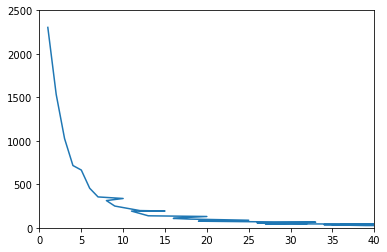

In [28]:
s.plot(kind = 'line',xlim = [0,40],ylim = [0,2500])

In [31]:
m = df2['COUNTRY'].value_counts()
m

United States             5237
United Kingdom             859
Canada                     507
Italy                      309
Ecuador                    287
China                      284
Jamaica                    268
Puerto Rico                257
Chile                      218
Mexico                     206
Venezuela                  192
Philippines                158
France                     142
South Korea                139
Spain                      126
Greece                     124
South Africa               121
India                      111
Sri Lanka                  110
Dominican Republic          97
Norway                      87
Australia                   75
Thailand                    74
Malaysia                    70
Japan                       68
Barbados                    66
Trinidad and Tobago         63
Peru                        57
Slovenia                    56
Denmark                     55
                          ... 
British Virgin Islands       3
New Zeal